# Final Project 1 - Linear Regression

Develop by :
- Kevin Anggara Putra
- Daniel Leksono
- Ines Savitri

### Data Overview:
[Reference : Uber and Lyft Dataset Boston, MA]

- id : Unique identifier for each column
- timestamp : Unix timestamp
- hour : Hour of the day
- day : Day of the week
- month : Month in a year
- datetime : Date value
- timezone : Timezone
- source : Initial source of the ride
- destination : Destination of the ride
- cab_type : The type of cab
- price : Price of the ride
- distance : Total distance of the requested ride
- surge_multiplier : Times of the normal price
- temperature : Temperature of the ride
- apparentTemperature : Apparent temperatur of the ride
- summary : Weather report summary of the day
- humidity : Humidity of the ride
- windSpeed : Wind speed of the ride
- windGust : Wind gust of the ride
- uvIndex : UV index of the ride

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

import scipy.stats

In [3]:
# Download Datasets
df = pd.read_csv('rideshare_kaggle.csv')

df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# Mengetahui jumlah data dan kolom
df.shape

(693071, 57)

### Data Preprocessing
- Dealing with Missing Value

In [5]:
# Cleansing data dengan standar missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari output di atas kita mengetahui bahwa ada missing value di kolom 'price', jadi data tersebut akan dibersihkan

In [6]:
# Fill NULL values
df['price'].fillna(df['price'].median(), inplace=True)
df['price']

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068    13.5
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

In [7]:
# Check NULL values
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Berdasarkan keterangan di atas, data yang akan dipakai sudah bersih, tidak ada data yang hilang atau rusak, sehingga data dapat diolah.

In [8]:
# Mengetahui nilai unik |data column
for col in df.columns :
  print(col, 'Unique Value')
  print(df[col].unique())
  print('-'*100)

id Unique Value
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
----------------------------------------------------------------------------------------------------
timestamp Unique Value
[1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54377528e+09
 1.54507051e+09 1.54473900e+09]
----------------------------------------------------------------------------------------------------
hour Unique Value
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
----------------------------------------------------------------------------------------------------
day Unique Value
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
----------------------------------------------------------------------------------------------------
month Unique Value
[12 11]
--------------------------

[' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']
----------------------------------------------------------------------------------------------------
long_summary Unique Value
[' Rain throughout the day. '
 ' Rain until morning, starting again in the evening. '
 ' Light rain in the morning. ' ' Partly cloudy throughout the day. '
 ' Mostly cloudy throughout the day. '
 ' Light rain in the morning and overnight. '
 ' Light rain until evening. ' ' Foggy in the morning. '
 ' Overcast throughout the day. ' ' Possible drizzle in the morning. '
 ' Rain in the morning and afternoon. ']
----------------------------------------------------------------------------------------------------
precipIntensity Unique Value
[0.     0.1299 0.0246 0.0624 0.0567 0.0036 0.007  0.1088 0.0341 0.0308
 0.0094 0.0013 0.0053 0.002  0.1264 0.0216 0.005  0.008  0.0288 0.0488
 0.0074 0.0017 0.0023 0.0274 0.0015 0.0031 0.0923 0.092  0.018

[32.7  41.83 31.1  26.64 28.61 34.41 39.54 48.02 44.5  43.52 27.99 29.72
 27.31 10.87 18.66 37.56 20.53 26.83 27.53 30.94 34.56  9.22 27.27 35.13
 39.47 31.96 31.67 43.32 31.63 30.89 47.81 40.83 46.13 29.78 36.81 28.31
 28.08 35.8  26.84 22.79 43.75 28.39 32.52 33.96 44.71 28.91 26.45 41.5
 31.68 27.12 45.86 39.51 46.76 29.86 41.98 47.14 19.51  9.15 29.27 44.19
 29.57 29.33  9.85 27.14 46.7  26.98 50.67 35.31 27.26 48.54 44.89 28.96
 31.61  9.98 31.95 27.2  28.36  7.06 36.14 27.29  8.55 35.26 28.63 28.1
 43.94 37.03 26.99 29.42 44.36 36.27 31.82 10.7  39.17 13.07 15.74 34.28
 32.42 45.78  6.46 27.65 29.05 34.39 27.87 26.59 44.14 49.27 31.05 27.51
  9.69 27.86 22.07 42.99 42.14 23.09 32.99 41.99  6.89 33.41 10.29 32.91
 39.68 32.06 26.27 41.58 39.06 33.58 14.76 33.71 27.9  29.17 28.43 29.13
 30.3  31.81 30.32 28.42 25.09 27.35 37.83 33.19 35.04 44.22 26.77 43.33
 47.06 31.27 31.36 31.55 33.78 37.36 34.94 16.42 35.48 39.3   8.68 26.11
 40.38 31.21 38.14 34.67 33.05 34.98 46.56 22.45 26.8

[33.73 36.2  31.04 30.3  29.11 27.39 37.45 35.84 39.9  32.43 29.29 30.19
 26.41 13.79 33.98 31.14 28.06 33.76 32.05 11.82 30.98 37.17 28.4  36.78
 32.4  27.72 35.85 35.78 27.76 27.26 29.97 36.46 25.87 39.41 35.33 30.03
 36.64 11.86 26.2  35.88 37.04 31.4  32.6  14.08 28.61 29.07 27.16 12.13
 30.08 33.55 24.51 28.12 29.88 31.86 39.54 27.8  39.73 31.95 27.23 13.6
 13.65 35.71 39.51 30.92 29.94 32.26 39.59 27.95 30.81 24.47 37.46 12.12
 28.43 13.52 13.72 33.84 30.9  28.1  27.2  27.41 39.65 30.8  36.48 40.05
 28.18 31.8  13.47 36.4  37.08 11.83 36.96 31.81 33.64 33.99 13.71 34.01
 30.85 11.99 13.97 31.26 36.39 28.11 27.77 28.3  24.61 33.68 26.32 36.43
 17.83 28.17 30.13 27.58 28.13 34.03 11.81 36.49 24.55 37.55 17.99 13.67
 27.88 20.55 26.3  13.73 35.73 26.35 37.01 28.19 20.01 37.37 31.25 29.03
 36.56 12.21 13.91 38.28 38.23]
----------------------------------------------------------------------------------------------------
apparentTemperatureMinTime Unique Value
[1545012000 1543291200 15

- Explore Data

In [9]:
# Melihat 5 teratas dataset
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [10]:
# Melihat 5 terbawah dataset
df.tail(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [11]:
# Mengetahui korelasi antar data
df.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000742,0.003553,0.000572,0.168130,-0.136802,-0.248748,...,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000509,0.002280,-0.000077,0.019493,-0.006295,0.218769,...,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000587,-0.000627,0.001389,0.006838,0.078690,-0.084116,...,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000788,0.002298,-0.000628,0.085791,-0.126912,-0.081774,...,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000742,0.000509,-0.000587,0.000788,1.000000,0.328601,0.243286,0.001922,-0.001249,-0.000172,...,0.001034,0.000696,-0.000487,0.000705,-0.000601,0.000697,-0.000640,0.000742,-0.000343,0.000679
distance,0.003553,0.002280,-0.000627,0.002298,0.328601,1.000000,0.024769,0.000819,-0.000293,-0.002884,...,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.243286,0.024769,1.000000,0.001375,-0.001829,-0.001572,...,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.001922,0.000819,0.001375,1.000000,-0.531259,-0.098604,...,-0.047535,0.171820,-0.114185,0.169592,-0.108953,0.175177,-0.096084,0.170921,-0.082600,0.173206
longitude,-0.136802,-0.006295,0.078690,-0.126912,-0.001249,-0.000293,-0.001829,-0.531259,1.000000,0.012183,...,0.030753,-0.136724,0.048723,-0.140403,-0.007274,-0.137041,0.010138,-0.140518,-0.022854,-0.135621
temperature,-0.248748,0.218769,-0.084116,-0.081774,-0.000172,-0.002884,-0.001572,-0.098604,0.012183,1.000000,...,0.333081,-0.254467,0.789261,-0.242698,0.780546,-0.253881,0.817521,-0.231513,0.703208,-0.255288


In [12]:
# Persiapan Dataset
# Memilih dataset yang akan dianalisis
data = df[['day', 'month', 'datetime', 'source', 'destination', 'cab_type', 'name', 'price', 'distance','surge_multiplier']].copy()
data.head(10)

,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
0,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
5,17,12,2018-12-17 18:25:12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0
6,26,11,2018-11-26 05:03:00,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0
7,2,12,2018-12-02 19:53:04,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0
8,3,12,2018-12-03 06:28:02,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0
9,27,11,2018-11-27 10:45:22,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0


In [13]:
#Menambahkan beberapa format non standard missing values
miss_values = ['NA', 'NaN', 'na', 'n/a', 'n-a' "--", "?", ' ',' -  ']

data = data.replace(miss_values, np.NaN)
data

,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
0,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...,...,...
693066,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberX,9.5,1.00,1.0
693068,1,12,2018-12-01 23:53:05,West End,North End,Uber,Taxi,13.5,1.00,1.0
693069,1,12,2018-12-01 23:53:05,West End,North End,Uber,Black SUV,27.0,1.00,1.0


In [14]:
data['price'].isnull().sum()

0

In [15]:
# Karena ada missing value pada 'price' maka akan dilakukan cleaning data
data['price'].fillna(data['price'].interpolate(), inplace = True)
data['price']

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068    13.5
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

In [16]:
data['price'].isnull().sum()

0

In [17]:
data[data.duplicated()]

,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
11799,28,11,2018-11-28 13:50:08,Financial District,North End,Uber,Black SUV,27.5,1.21,1.0
12966,27,11,2018-11-27 00:14:29,Haymarket Square,Theatre District,Uber,Taxi,13.5,1.16,1.0
26932,18,12,2018-12-18 00:30:13,Theatre District,North End,Lyft,Shared,7.0,1.73,1.0
30462,29,11,2018-11-29 03:35:07,North Station,Fenway,Uber,WAV,10.5,3.05,1.0
31160,2,12,2018-12-02 18:23:07,Financial District,South Station,Uber,Black,15.0,0.39,1.0
...,...,...,...,...,...,...,...,...,...,...
690736,16,12,2018-12-16 10:55:04,Haymarket Square,North Station,Uber,Black SUV,27.5,0.49,1.0
691761,16,12,2018-12-16 00:55:05,Theatre District,North End,Uber,UberX,8.5,1.57,1.0
692491,27,11,2018-11-27 04:42:21,Theatre District,Northeastern University,Lyft,Lux,16.5,2.16,1.0
692714,28,11,2018-11-28 21:38:08,Northeastern University,Theatre District,Uber,WAV,8.5,2.81,1.0


In [18]:
# Melihat dimensi dataset
data.drop_duplicates(subset = data.columns, keep = 'first', inplace = True)
data.shape

(691578, 10)

In [19]:
data.isnull().sum()

day                 0
month               0
datetime            0
source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691578 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   day               691578 non-null  int64  
 1   month             691578 non-null  int64  
 2   datetime          691578 non-null  object 
 3   source            691578 non-null  object 
 4   destination       691578 non-null  object 
 5   cab_type          691578 non-null  object 
 6   name              691578 non-null  object 
 7   price             691578 non-null  float64
 8   distance          691578 non-null  float64
 9   surge_multiplier  691578 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 58.0+ MB


In [21]:
data.isnull().sum()

day                 0
month               0
datetime            0
source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
dtype: int64

In [22]:
# add coloumn year, month, date, fetched from 'datetime' column, then remove 'datetime' column
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
data.drop('datetime',inplace=True, axis=1)

In [23]:
data.head(10)

,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,year
0,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,2018
1,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,2018
2,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,2018
3,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,2018
4,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,2018
5,17,12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0,2018
6,26,11,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0,2018
7,2,12,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0,2018
8,3,12,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0,2018
9,27,11,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0,2018


In [24]:
# Check the unique value data column
for col in data.columns :
  print(col, 'Unique Value')
  print(data[col].unique())
  print('-'*100)

day Unique Value
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
----------------------------------------------------------------------------------------------------
month Unique Value
[12 11]
----------------------------------------------------------------------------------------------------
source Unique Value
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
----------------------------------------------------------------------------------------------------
destination Unique Value
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
----------------------------------------------------------------------------------------------------
cab_type Unique Value
['Lyft' 'Uber']
--------------------

In [25]:
data.describe()

,day,month,price,distance,surge_multiplier,year
count,691578.000000,691578.000000,691578.000000,691578.000000,691578.000000,691578.0
mean,17.787593,11.587111,16.307702,2.189941,1.013900,2018.0
std,9.982174,0.492354,8.988270,1.139030,0.091738,0.0
min,1.000000,11.000000,2.500000,0.020000,1.000000,2018.0
25%,13.000000,11.000000,9.500000,1.280000,1.000000,2018.0
50%,17.000000,12.000000,13.500000,2.160000,1.000000,2018.0
75%,28.000000,12.000000,22.500000,2.930000,1.000000,2018.0
max,30.000000,12.000000,97.500000,7.860000,3.000000,2018.0


In [26]:
# Mengubah data string ke data numerik
d = {'Lyft':1, 'Uber':2}
data['cab_type'] = df['cab_type'].map(d)
d = {'Shared':1, 'Lux':2, 'Lyft':3, 'Lux Black XL':4, 'Lyft XL':5, 'Lux Black':6, 'Uber XL':7,
     'Black':8, 'UberX':9, 'WAV':10, 'Black SUV':11, 'UberPool':12, 'Taxi':13}
data['name'] = df['name'].map(d)
#d = {'Clear':1, 'Partly Cloudy':2, 'Mostly Cloudy':3, 'Overcast':4, 'Possible Drizzle':5, 'Drizzle':6, 
#     'Light Rain':7, 'Rain':8, 'Foggy':9}
#data['short_summary'] = df['short_summary'].map(d)

print(data)

        day  month            source    destination  cab_type  name  price  \
0        16     12  Haymarket Square  North Station         1   1.0    5.0   
1        27     11  Haymarket Square  North Station         1   2.0   11.0   
2        28     11  Haymarket Square  North Station         1   3.0    7.0   
3        30     11  Haymarket Square  North Station         1   4.0   26.0   
4        29     11  Haymarket Square  North Station         1   5.0    9.0   
...     ...    ...               ...            ...       ...   ...    ...   
693066    1     12          West End      North End         2   NaN   13.0   
693067    1     12          West End      North End         2   9.0    9.5   
693068    1     12          West End      North End         2  13.0   13.5   
693069    1     12          West End      North End         2  11.0   27.0   
693070    1     12          West End      North End         2  12.0   10.0   

        distance  surge_multiplier  year  
0           0.44    

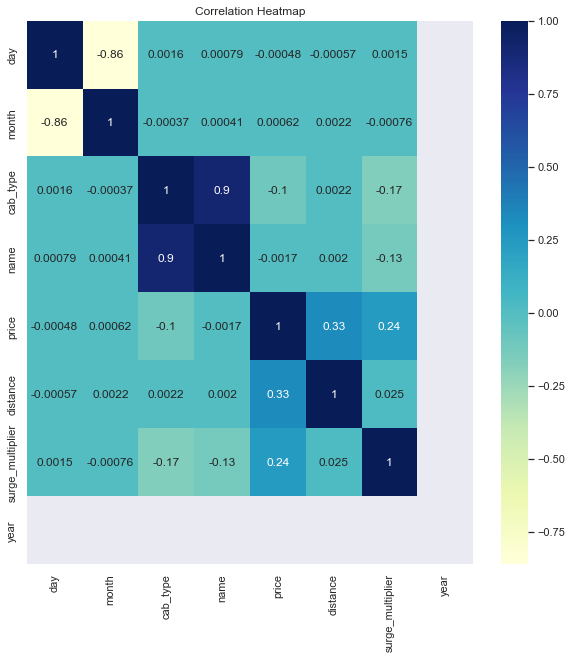

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap");

In [28]:
data.isnull().sum()

day                     0
month                   0
source                  0
destination             0
cab_type                0
name                55005
price                   0
distance                0
surge_multiplier        0
year                    0
dtype: int64

In [29]:
# Fill NULL values
data['name'].fillna(data['name'].median(), inplace=True)
data['name']

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
          ... 
693066     8.0
693067     9.0
693068    13.0
693069    11.0
693070    12.0
Name: name, Length: 691578, dtype: float64

In [30]:
data.isnull().sum()

day                 0
month               0
source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
year                0
dtype: int64

## Data Prepocessing

### Features 

Mengetahui kemungkinan-kemungkinan setiap kolom pada data

1. Data 'day'
Pertanyaan : Berapa banyak penggunan taksi per tanggal

<AxesSubplot:xlabel='day', ylabel='count'>

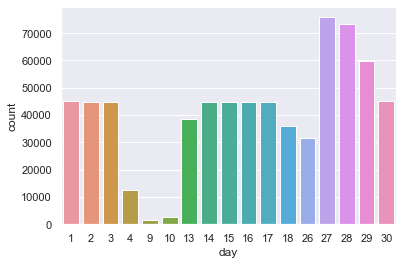

In [41]:
sns.countplot(x='day', data = data)

2. Jumlah Pengguna disetiap bulan

<AxesSubplot:xlabel='month', ylabel='count'>

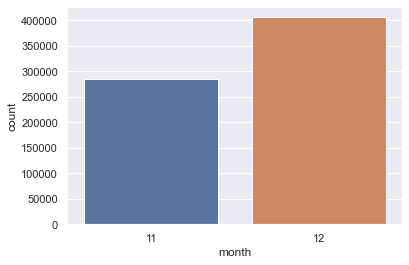

In [42]:
sns.countplot(x='month', data = data)

3. Jumlah pengguna berdasarkan Type

<AxesSubplot:xlabel='cab_type', ylabel='count'>

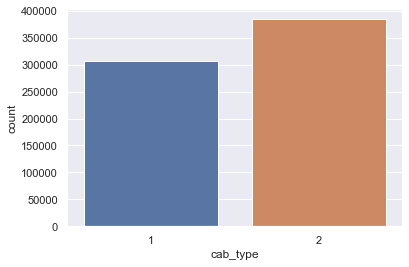

In [43]:
sns.countplot(x='cab_type', data = data)

4. Jumlah pengguna berdasarkan Jarak

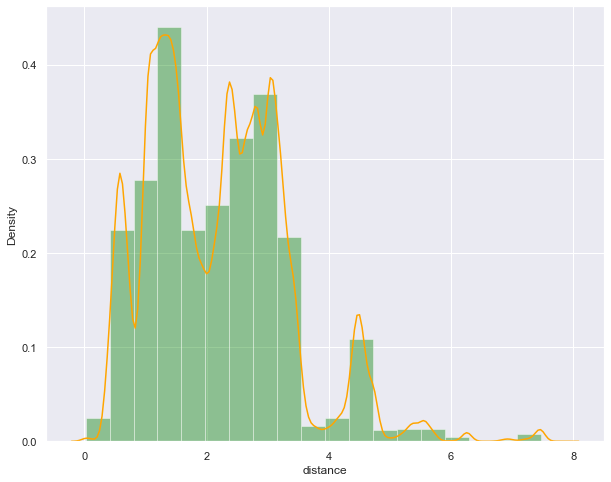

In [45]:
plt.figure(figsize=(10, 8))
sns.distplot(df['distance'], color='green', bins=20, hist_kws={'alpha': 0.4}, kde_kws={"color": "orange"})
plt.show()

### Distribusi Analisis untuk 'Price'

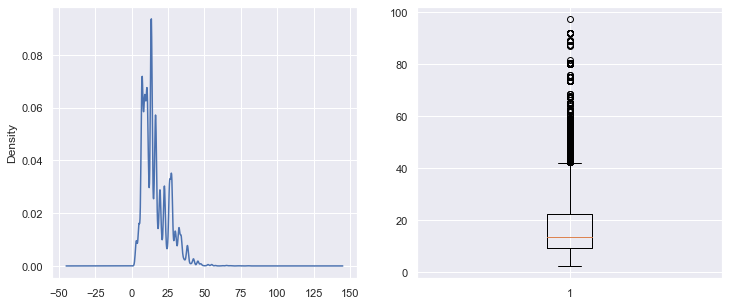

In [46]:
# Distribusi analisis 'price'

f = plt.figure(figsize=(12, 5))

f.add_subplot(1,2,1)
data['price'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data['price'])
plt.show()

In [47]:
data['price'].mean()

16.307702066867364

In [48]:
data['price'].median()

13.5

In [49]:
data['price'].mode()

0    13.5
Name: price, dtype: float64

In [108]:
# Ukuran Persebaran Data
import scipy.stats
print('Range: ', np.ptp(data['price']))
print('Variance: ', np.var(data['price']))
print('Standar Deviation: ', np.std(data['price']))
print('Skewness: ', scipy.stats.skew(data['price']))

Range:  95.0
Variance:  80.78887555233537
Standar Deviation:  8.988263211117895
Skewness:  1.1530225584612785


Dari output di atas, dapat diketahui bahwa distribusi kolom 'price' membentuk distribusi normal positif yaitu ekor bagian kanan lebih panjang, dapat kita klihat ukuran persebaran data nilai skewness (ukuran kemiringan) menunjukkan angka 1.15. Serta mean menunjukkan angka 16.3. Untuk selanjutnya, kolom price akan kita gunakan sebagai variabel y (dependent variabel)

### Scalling Data

In [51]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# load dataprint(data)
print(data)

# Menentukan variabel
X = data[['day','month','distance','cab_type','name','surge_multiplier']]
y = data[['price']]

# split data training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        day  month            source    destination  cab_type  name  price  \
0        16     12  Haymarket Square  North Station         1   1.0    5.0   
1        27     11  Haymarket Square  North Station         1   2.0   11.0   
2        28     11  Haymarket Square  North Station         1   3.0    7.0   
3        30     11  Haymarket Square  North Station         1   4.0   26.0   
4        29     11  Haymarket Square  North Station         1   5.0    9.0   
...     ...    ...               ...            ...       ...   ...    ...   
693066    1     12          West End      North End         2   8.0   13.0   
693067    1     12          West End      North End         2   9.0    9.5   
693068    1     12          West End      North End         2  13.0   13.5   
693069    1     12          West End      North End         2  11.0   27.0   
693070    1     12          West End      North End         2  12.0   10.0   

        distance  surge_multiplier  year  
0           0.44    

In [52]:
print(X)
print(y)

        day  month  distance  cab_type  name  surge_multiplier
0        16     12      0.44         1   1.0               1.0
1        27     11      0.44         1   2.0               1.0
2        28     11      0.44         1   3.0               1.0
3        30     11      0.44         1   4.0               1.0
4        29     11      0.44         1   5.0               1.0
...     ...    ...       ...       ...   ...               ...
693066    1     12      1.00         2   8.0               1.0
693067    1     12      1.00         2   9.0               1.0
693068    1     12      1.00         2  13.0               1.0
693069    1     12      1.00         2  11.0               1.0
693070    1     12      1.00         2  12.0               1.0

[691578 rows x 6 columns]
        price
0         5.0
1        11.0
2         7.0
3        26.0
4         9.0
...       ...
693066   13.0
693067    9.5
693068   13.5
693069   27.0
693070   10.0

[691578 rows x 1 columns]


## Aplikasi Algoritma
### Linear Regression

In [79]:
# Import
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Tambahkan variabel
X = data[['day','month','distance','cab_type','name','surge_multiplier']]
y = data[['price']]

In [80]:
# Split data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Persentase data
print('{0:0.2f}% ada pada data pelatihan'.format((len(X_train)/len(df.index)) * 100))
print('{0:0.2f}% ada pada data pengujian'.format((len(X_test)/len(df.index)) * 100))

79.83% ada pada data pelatihan
19.96% ada pada data pengujian


In [82]:
# Menerapkan model pada data pelatihan
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

LinearRegression()

In [85]:
y_train.shape

(553262, 1)

In [86]:
lr = LinearRegression().fit(X_train, y_train)

In [87]:
print('intercept: ', lr.intercept_)
print('slope: ', lr.coef_)

intercept:  [-5.13359219]
slope:  [[-3.08913468e-03 -6.45573597e-02  2.55314600e+00 -7.25760492e+00
   9.09079219e-01  2.11075641e+01]]


Intercept adalah suatu titik perpotongan antara suatu garis dengan sumbu Y pada diagram kartesius saat nilai X = 0.
Dari output yang didapat intercept sebesar -5.13359219

In [88]:
y_pred = lr.predict(X_test)
y_pred

array([[10.4639658 ],
       [18.39608286],
       [15.14353411],
       ...,
       [18.63706751],
       [13.69674452],
       [16.14235018]])

In [92]:
y_pred.shape

(138316, 1)

In [93]:
print('Linear Regression train R-squared : %.4f' % lr.score(X_train, y_train))
print('Linear Regression test R-squared : %.4f' % lr.score(X_test, y_test))

Linear Regression train R-squared : 0.1998
Linear Regression test R-squared : 0.1990


In [96]:
# Cek perkiraan  jika kita menggunakan kolom distance
distance = 1
score = -5.13359219 * distance + 2.55314600
print(score)

-2.58044619


In [97]:
# Membuat prediksi
def calc(slope, intercept, hours):
    return slope*distance+intercept

score = calc(lr.coef_, lr.intercept_, 9.5)
score

array([[ -5.13668133,  -5.19814955,  -2.5804462 , -12.39119712,
         -4.22451297,  15.97397194]])

In [98]:
# Menerapkan model pada data pengujian
y_pred = regressor.predict(X_test)

In [99]:
data_pre = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(data_pre)

        Actual  Predicted
22975      5.0  10.463966
23605     33.0  18.396083
462408     7.5  15.143534
330336    22.0  14.936567
162877     7.5  12.826756
...        ...        ...
376086     5.0  14.270110
274988    13.5  17.022809
458046    16.5  18.637068
473548    19.5  13.696745
390962     7.5  16.142350

[138316 rows x 2 columns]


In [100]:
# Menggunakan matrik untuk melihat pengujian
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [101]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [103]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 6.65
Mean squared error: 65.00
Root mean squared error: 8.06


In [106]:
# Menghitung akurasi model
from sklearn.metrics import r2_score

In [107]:
r2_score(X_t)

ValueError: y_true and y_pred have different number of output (6!=1)